<div style='text-align:center'>
    <h1 style='font-size: 60px; margin-bottom: 1rem'>GWANW 2024 Demo</h1>
    <p style='font-size: 25px;'>A (live 😱) demo of some of the capabilities of LEGWORK</p>
</div>

This notebook is just a list of headings, for the full code that goes with them check out the separate notebooks in the folder! Below are some imports that I'll need later

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from ipywidgets import interact, FloatSlider

import legwork as lw

# Demo 1: Interactive SNR calculations

#### An intro to `Source`

#### A function to print the SNR and merger time of a single source

#### Interactive sliders

# Demo 2: Evolving source populations

#### Initialise a random set of sources

#### Some plotting routines
- How does the mass distribution change for detectable sources?

#### Calculate merger times
- Compare (`f_orb`, `ecc`) with the merger times

#### Evolve sources
- Compare how `f_orb` and `ecc` have changed

### Evolve sources different times

# Demo 3 - Compare sensitivity curves

#### Plot a sensitivity curve

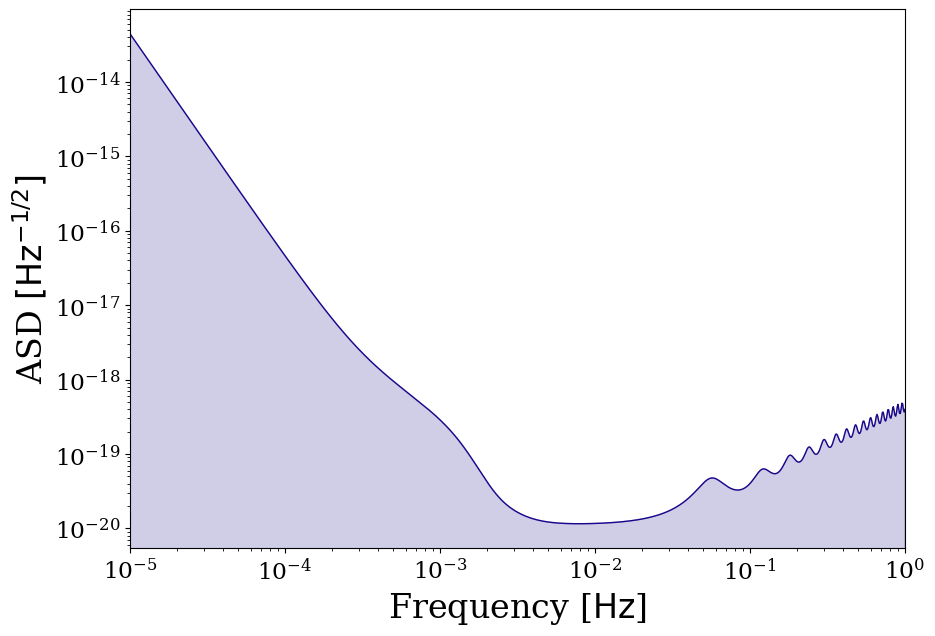

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Frequency [$\\rm Hz$]', ylabel='ASD $[\\rm Hz^{-1/2}]$'>)

In [62]:
lw.visualisation.plot_sensitivity_curve()

#### LISA variations (observation time, arm length)

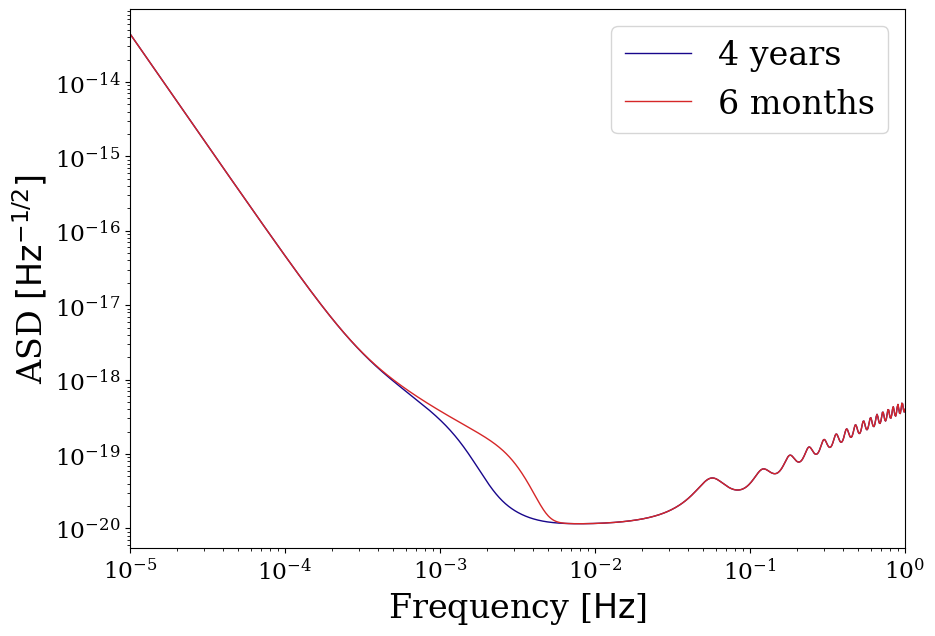

In [64]:
fig, ax = lw.visualisation.plot_sensitivity_curve(show=False, fill=False, label="4 years")
fig, ax = lw.visualisation.plot_sensitivity_curve(fig=fig, ax=ax, t_obs=0.5 * u.yr, color="tab:red", show=False, fill=False, label="6 months")
ax.legend()
plt.show()

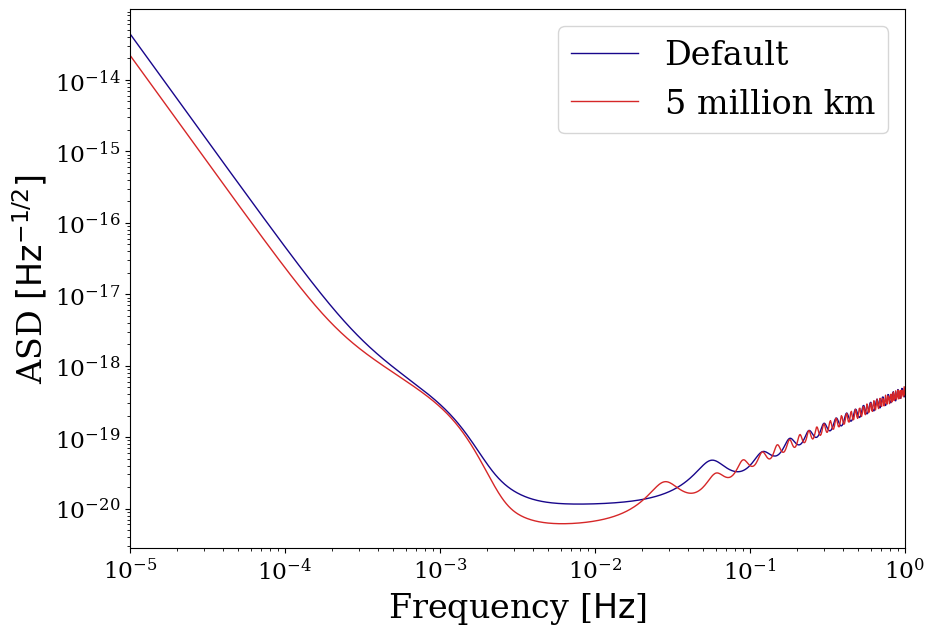

In [65]:
fig, ax = lw.visualisation.plot_sensitivity_curve(show=False, fill=False, label="Default")
fig, ax = lw.visualisation.plot_sensitivity_curve(fig=fig, ax=ax, L=5e6 * u.km, color="tab:red", show=False, fill=False, label="5 million km")
ax.legend()
plt.show()

#### Different detectors

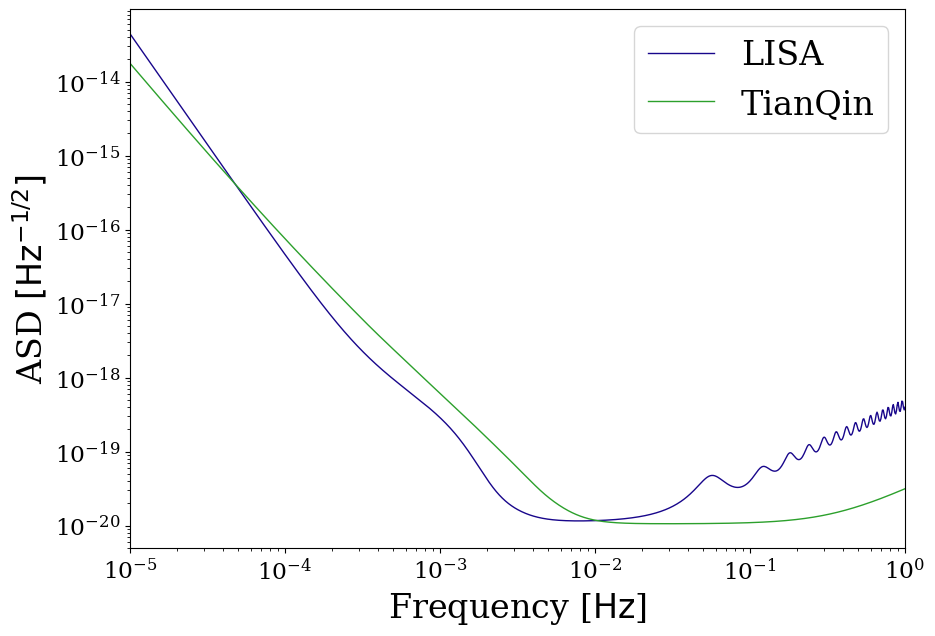

In [68]:
fig, ax = lw.visualisation.plot_sensitivity_curve(show=False, fill=False, label="LISA")
fig, ax = lw.visualisation.plot_sensitivity_curve(fig=fig, ax=ax, instrument="TianQin", color="tab:green", show=False, fill=False, label="TianQin")
ax.legend()
plt.show()

#### Calculating SNRs in each

- Avoid interpolating the SC
- Compare LISA and TianQin
- Custom instrument

In [85]:
# create a random collection of sources
n_values = 1500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.normal(8, 1.5, n_values) * u.kpc
f_orb = 10**(-5 * np.random.power(3, n_values)) * u.Hz
ecc = 1 - np.random.power(5, n_values)

In [149]:
def custom_psd(f, **kwargs):
    lisa_psd = lw.psd.lisa_psd(f)
    lisa_psd[f < 1e-4 * u.Hz] /= 10
    return lisa_psd 

In [150]:
sources = lw.source.Source(m_1=m_1, m_2=m_2, ecc=ecc, dist=dist, f_orb=f_orb, interpolate_sc=False)

In [151]:
lisa_snr = sources.get_snr().copy()

In [152]:
sources.update_sc_params({
    "instrument": "custom",
    "custom_psd": custom_psd
})

In [153]:
alt_snr = sources.get_snr(verbose=True).copy()

Calculating SNR for 1500 sources
	0 sources have already merged
	1382 sources are stationary
		401 sources are stationary and circular
		981 sources are stationary and eccentric
	118 sources are evolving
		23 sources are evolving and circular
		95 sources are evolving and eccentric


In [158]:
ratio = alt_snr / lisa_snr

/tmp/ipykernel_115576/453072164.py:1: RuntimeWarning: invalid value encountered in divide
  ratio = alt_snr / lisa_snr


/tmp/ipykernel_115576/2005447145.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist(alt_snr / lisa_snr, bins="fd")


(array([969.,  27.,  22.,  23.,  14.,  31.,  37., 367.]),
 array([1.        , 1.31694174, 1.63388348, 1.95082521, 2.26776695,
        2.58470869, 2.90165043, 3.21859217, 3.53553391]),
 <BarContainer object of 8 artists>)

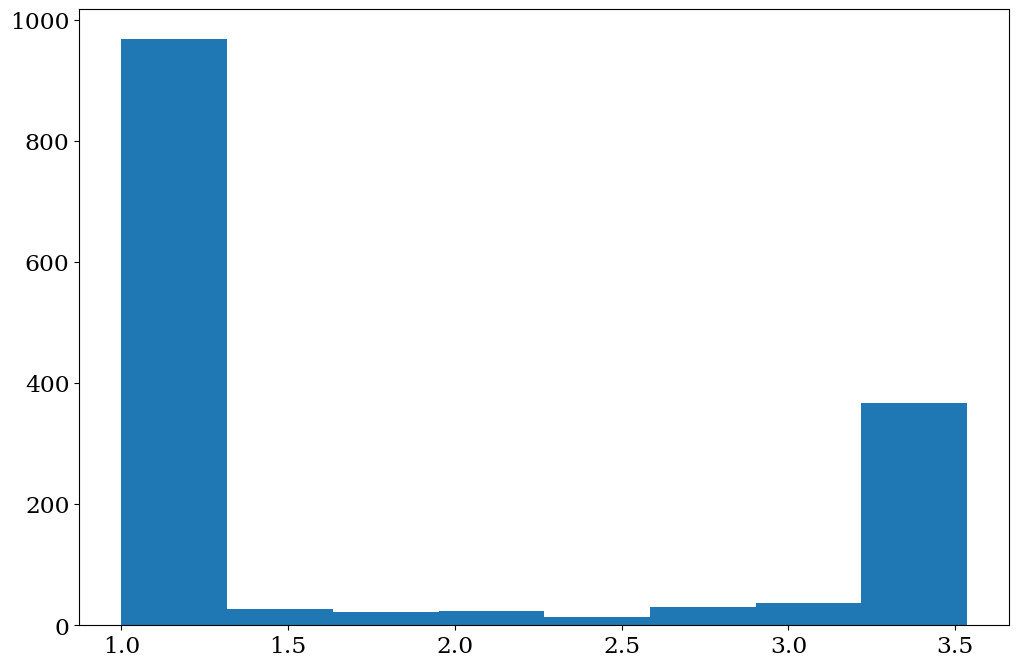

In [157]:
plt.hist(alt_snr / lisa_snr, bins="fd")